# Gauss-type quadrature

An important operation in numerical analysis is to calculate the integrals of functions. In general, 
$$
\int_{-1}^{1} u(x)\:dx \approx \sum_{i=1}^N w_i u(x_i)
$$
In this expression, $w_i$ is a weight for node $x_i$. For different numerical integration procedures, different weights and nodes are used. 


If polynomials of order $m$ are to be integrated exactly, initially, since $m+1$ coefficients are necessary to define the polynomial, there should be $m+1$ arbitrary nodes and weights. If, on the other hand, the nodes can be fixed beforehand, it is possible to do better.

## Jacobi formulae

Often a weighed integral is useful:

$$
\int_{-1}^{1} (1-x)^\alpha(1+x)^\beta u(x)\:dx = \sum_{i=1}^Q w_i^{\alpha,\beta} u(x^{\alpha,\beta}_i) + R(u)
$$
where R(u) is a remainder which can be zero if $u(x) \in \mathcal{P}_{2Q-k}([-1,1])$

Depending on the number of nodes that are free to float (assume any value necessary to the procedure) different integration schemes are possible:

 * Gauss-Jacobi - $k=1$. Prefix `gj`.
 * Gauss-Radau - $k=2$, one of the ends is included as a node. Prefix `grjm` when -1 is included or `grjp` when 1 is included.
 * Gauss-Lobatto - $k=3$, both ends are included as nodes. Prefix `glj`.
 




## Computing the nodes

Nodes emplyed in the quadrature can be calculated using the following functions:
 
 * `zgj(Q, a, b)` for Gauss-Jacobi with $Q$ nós, weights $\alpha=$`a` and $\beta=$`b`.
 * `zgj(Q, a, b)` for Gauss-Lobatto-Jacobi.
 * `zgrjm(Q, a, b)` for Gauss-Radau-Jacobi including the end -1.
 * `zgrjp(Q, a, b)` for Gauss-Radau-Jacobi including the end 1.
  

In [87]:
using Jacobi
Q = 5
alpha=0.3
beta = 0.8
zgj(Q, alpha, beta) # Gauss-Jacobi

5-element Array{Float64,1}:
 -0.831871 
 -0.443304 
  0.0612254
  0.548652 
  0.890523 

In [88]:
zgrjm(Q, alpha, beta) # Gauss-Radau-Jacobi, -1

5-element Array{Float64,1}:
 -1.0      
 -0.635289 
 -0.0985338
  0.460364 
  0.867517 

In [89]:
zgrjp(Q, alpha, beta) # Gauss-Radau-Jacobi, 1

5-element Array{Float64,1}:
 -0.798703
 -0.343012
  0.22246 
  0.721235
  1.0     

In [90]:
zglj(Q, alpha, beta) # Gauss-Lobatto-Jacobi

5-element Array{Float64,1}:
 -1.0      
 -0.557811 
  0.0652664
  0.65738  
  1.0      

The default case is to calculate the zeros using  `Float64`, if some other type is necessary, just add the type as  a fourth argument. The only restriction is that this type should be a `FloatingPoint` since iteration is used.

In [91]:
zglj(5, 0, 0, Float32)

5-element Array{Float32,1}:
 -1.0     
 -0.654654
  0.0     
  0.654654
  1.0     

In [92]:
zgj(5, 0, 0, BigFloat)

5-element Array{BigFloat,1}:
 -9.061798459386639927976268782993929651256519107625308628737622865437707949166849e-01
 -5.384693101056830910363144207002088049672866069055599562022316270594711853677574e-01
  0e+00                                                                               
  5.384693101056830910363144207002088049672866069055599562022316270594711853677574e-01
  9.061798459386639927976268782993929651256519107625308628737622865437707949166849e-01

## Computing the weights

The functions to compute the weights follow the same naming scheme, just replace the letter `z` by `w`:

 * `wgj(z,a,b)`
 * `wgrjm(z,a,b)`
 * `wgrjp(z,a,b)`
 * `wglj(z,a,b)`
 
 The first argument `z` is an array with the zeros calculated previsouly:

In [93]:
a = 0
b = 0
z = zgj(5, a, b)
w = wgj(z, a, b)

5-element Array{Float64,1}:
 0.236927
 0.478629
 0.568889
 0.478629
 0.236927

To compute an integral, 

In [94]:
using Polynomials
u = Poly([10,9,8,7,6,5,4,3,2,1])

Poly(10 + 9x + 8x^2 + 7x^3 + 6x^4 + 5x^5 + 4x^6 + 3x^7 + 2x^8 + x^9)

In [95]:
Iu = polyint(u)

Poly(10.0x + 4.5x^2 + 2.6666666666666665x^3 + 1.75x^4 + 1.2x^5 + 0.8333333333333334x^6 + 0.5714285714285714x^7 + 0.375x^8 + 0.2222222222222222x^9 + 0.1x^10)

In [96]:
I = polyval(Iu, 1.0) - polyval(Iu, -1.0)

29.320634920634923

In [97]:
ui = polyval(u, z)

5-element Array{Float64,1}:
  5.40237
  6.727  
 10.0    
 19.1443 
 42.0764 

In [98]:
Igauss = sum(w.*ui)

29.320634920634923

In [99]:
err = Igauss - I

0.0

Since the quadrature had `Q=5` nodes and a Gauss-Jacobi scheme was used, the exact value of the integral was possible. As another example let's use the weights $\alpha=1$ and $\beta=1$. For integer weights, the integrand is stilla polynomial:

In [100]:
p = Poly([1,-1]) * Poly([1,1]) * u

Poly(10 + 9x - 2x^2 - 2x^3 - 2x^4 - 2x^5 - 2x^6 - 2x^7 - 2x^8 - 2x^9 - 2x^10 - x^11)

Using the same weights, 

In [101]:
Ip = polyint(p)
I2 = polyval(Ip, 1.0) - polyval(Ip, -1.0)
Igauss2 = sum(w.*polyval(p, z))
I2, I2-Igauss

(16.487157287157288,-12.833477633477635)

With new weights:

In [102]:
z2 = zgj(Q, 1, 1)
w2 = wgj(z2, 1, 1)
ui = polyval(u, z2)
Igab = sum(w2.*u2)
I2 - Igab

3.552713678800501e-15

Which is zero, except for some floting point error!

## Interpolation

The nodes of the quadrature can be used for polynomial interpolation using Lagrangean interpolants. If a function us evaluated at the nodes of the quadrature, 

$$
u_i = u(x_i^{\alpha,\beta})
$$

The corresponding Lagrangean interpolant is $h_i(x)$:

$$
h_i(x) = \prod_{k=1,k\ne i}^Q \frac{x - x_k^{\alpha,\beta}}{x_i^{\alpha,\beta} - x_k^{\alpha,\beta}}
$$

This can be computed using function `lagrange(i, x, z)` where `z` is an array of interpolation nodes


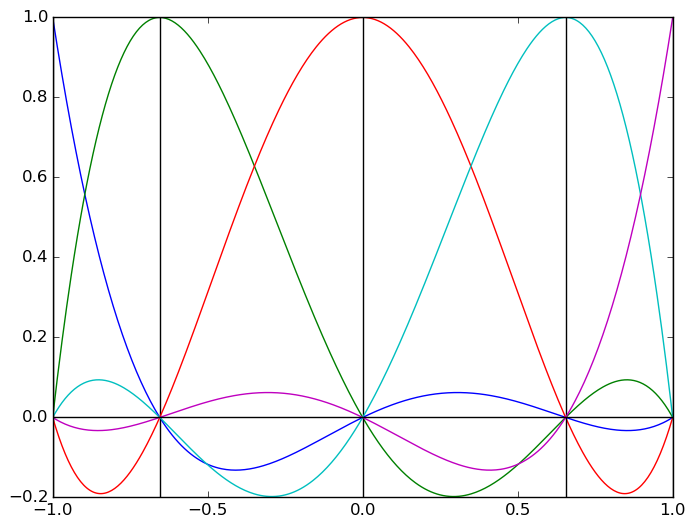

In [103]:
using PyPlot

x = linspace(-1,1, 401)
np = length(x)
Q = 5
z = zglj(Q)
h = zeros(np, Q)
for i = 1:Q
    for k = 1:np
        h[k,i] = lagrange(i, x[k], z)
    end
    plot(x, h[:,i])
    axvline(x=z[i], color="black")
end
axhline(y=0, color="black");



This was calculated using Gauss-Lobatto-Jacobi nodes. If equally spaced nodes were used things are not as pretty:

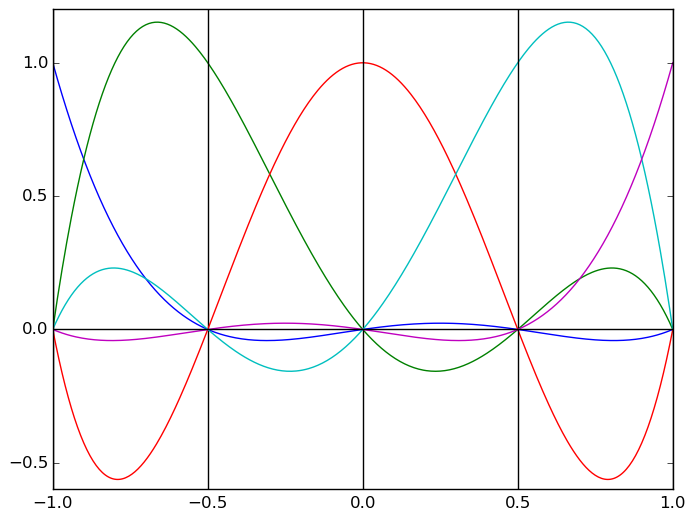

In [104]:
z = linspace(-1, 1, Q)
h = zeros(np, Q)
for i = 1:Q
    for k = 1:np
        h[k,i] = lagrange(i, x[k], z)
    end
    plot(x, h[:,i])
    axvline(x=z[i], color="black")
end
axhline(y=0, color="black");

It still works well but as the number of nodes increases, it will get worse.

## Interpolation matrix

If a function is known at a ser of nodes and has to be interpolated to another set of nodes several times, it is useful to build an interpolation matrix `Imat`
    

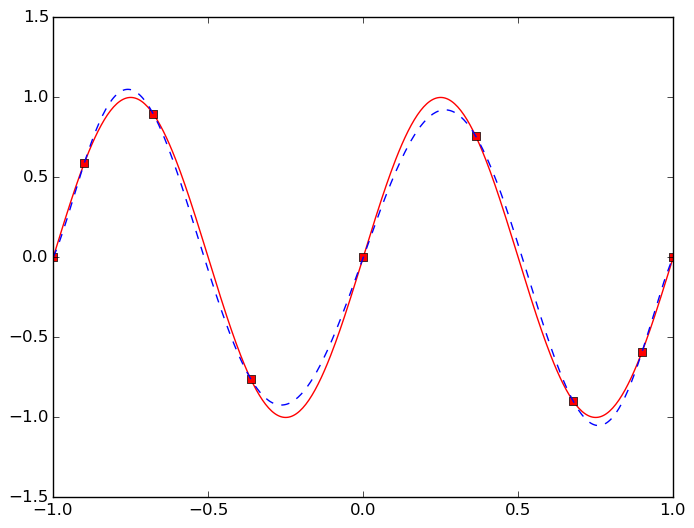

In [105]:
Q = 9
x = linspace(-1,1,401)
z = zglj(Q)
u = sin(2pi*z)
ue = sin(2pi*x)
imat = interp_mat(x, z)
ui = imat * u
plot(x, ue, "r", z, u, "rs", x, ui, "b--");

## Derivatives

The Lagrange polynomials can be easilly derived but there are explicit expressions for the derivatives at the quadrature nodes. The following functions can be used to calculate a derivative matrix:

 * `dgj(z, a, b)`
 * `dgrjm(z, a, b)`
 * `dgrjp(z, a, b)`
 * `dglj(z, a, b)`
 

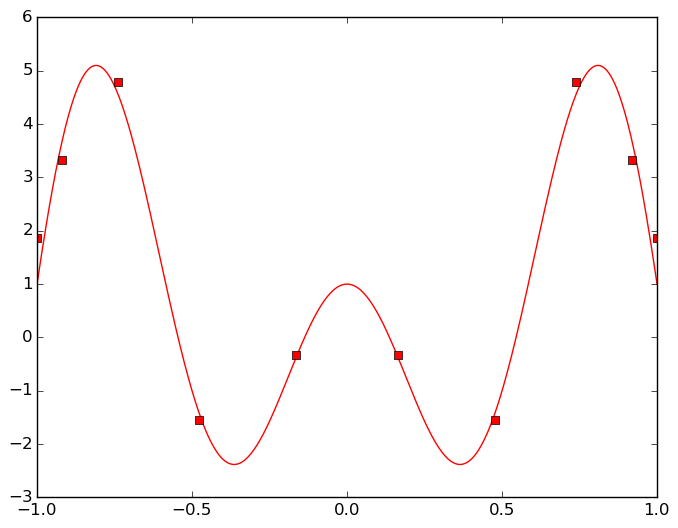

In [106]:
x = linspace(-1,1, 401)
Q = 10
z = zglj(Q)
u = z .* cos(2pi*z)
Dmat = dglj(z)
du = Dmat * u
du_exact = cos(2pi*x) - 2pi*x .* sin(2pi*x)

plot(x, du_exact, "r", z, du, "rs");

# Solving a differential equation


The differential equation is

$$
\frac{d^2u}{dx^2} + u = \sin 2\pi x
$$

To make things simpler, we will use the following Neumann BCs:

$$
\left.\frac{du}{dx}\right|_{x=-1} = \left.\frac{du}{dx}\right|_{x=1} = 0
$$

The weak form, for appropriate function spaces is:

$$
\int_{-1}^1 \frac{dv}{dx}\frac{du}{dx}\:dx - \left.v\frac{du}{dx}\right|_{-1}^1 - \int_{-1}^1 uv\:dx = -\int_{-1}^1 vf\:dx
$$

Using Lagrange interpolation at the nodes of the Gauss-Lobatto-Jacobi quadrature, we can solve this equation:

$$
u(x) = \sum_{k=1}^Q u_kh_k(x) \qquad v(x) = \sum_{i=1}^Q u_ih_i(x)
$$

Substituting in the weak form, 

$$
\left([L] - [M]\right)\{u\} = -[M]\{f\}
$$

where 

$$
M_{ik} = \int_{-1}^1 h_kh_i\:dx
$$
Usando a propria quadratura utilizada para definir os interpoladores $h_i(x)$ para se integrar esta expressão se obtém uma aproximação da integral mas próxima o suficiente se Q for grande. Com isso, esta matriz é diagonal com cada elemento da diagoal igual ao peso da quadratura:
$$
M_{ik} = w_i\delta_{ik}
$$
Ja a outra matrix é um pouco mais complicado:
$$
L_{ik} = \int_{-1}^1 \frac{dh_i}{dx}\frac{dh_k}{dx}\:dx = \sum_{\alpha=1}^Q w_\alpha D_{\alpha i} D_{\alpha k}
$$




In [107]:
function solve(Q, fun, x)
    z = zglj(Q)
    w = wglj(z)
    D = dglj(z)
    imat = interp_mat(x, z)
    f = fun(z)
    
    L = zeros(Q,Q)
    for i=1:Q, k=1:Q
        ll = 0.0
        for a = 1:Q
            ll = ll + w[a] * D[a,i] * D[a, k]
        end
        L[k,i] = ll
    end
    
    fr = zeros(Q)
    
    for i = 1:Q
        L[i,i] = L[i,i] - w[i]
        fr[i] = - f[i]*w[i]
    end
    
    u = L\fr
    ue = imat * u
    return ue
end
    

solve (generic function with 2 methods)

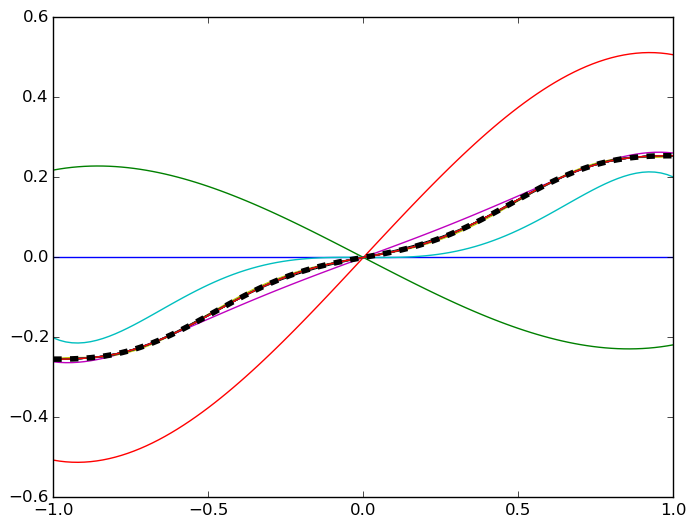

In [108]:
Q = 3:20
nq = length(Q)
x = linspace(-1, 1, 101)
np = length(x)
u = zeros(np, nq)
for i = 1:nq
    u[:,i] = solve(Q[i], x->sin(2pi*x), x)
end

for i = 1:(nq-1)
    plot(x, u[:,i])
end
plot(x, u[:,nq], "--", linewidth=4, color="black");

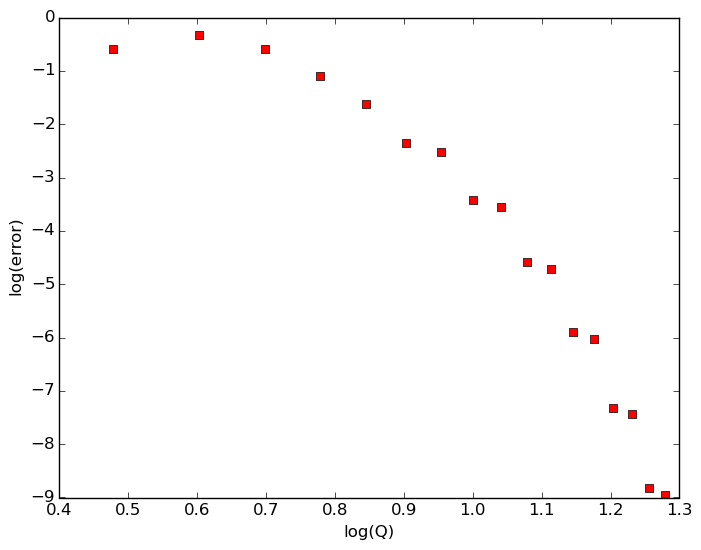

In [109]:
# Cálculo do erro:
ue = u[:,nq]

uerr = zeros(nq-1)

for i = 1:(nq-1)
    uerr[i] = maxabs(u[:,i] - ue)
end

plot(log10(Q[1:(nq-1)]), log10(uerr), "rs")
xlabel("log(Q)")
ylabel("log(error)");